
Fear vs Greed Summary

                   total_pnl  win_rate  trade_count  long_ratio
classification                                                 
Extreme Fear    52793.589178  0.327341  1528.571429    0.486538
Extreme Greed   23817.292199  0.467424   350.807018    0.456803
Fear            36891.818040  0.329112   679.527473    0.513495
Greed           11140.566181  0.335986   260.637306    0.493477
Neutral         19297.323516  0.331886   562.477612    0.499824


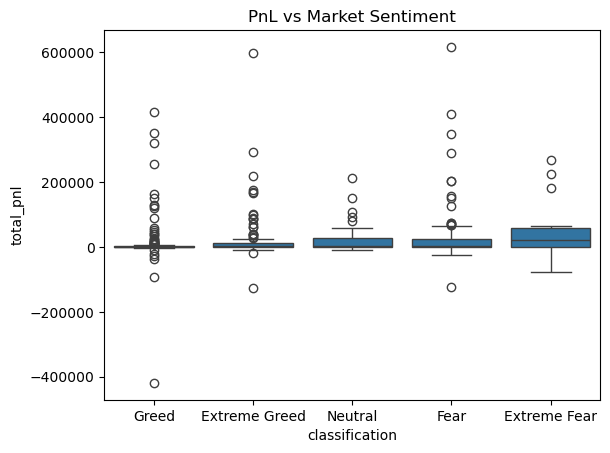

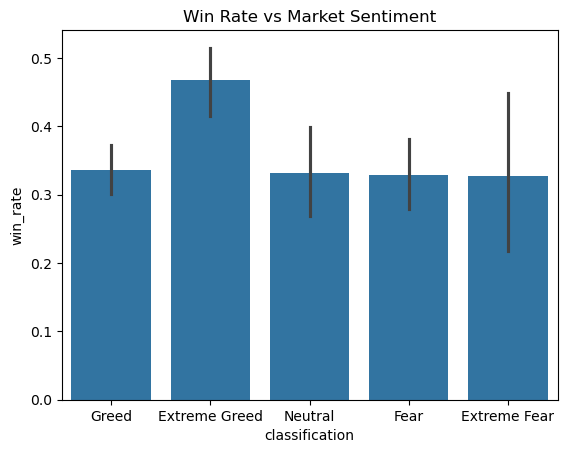

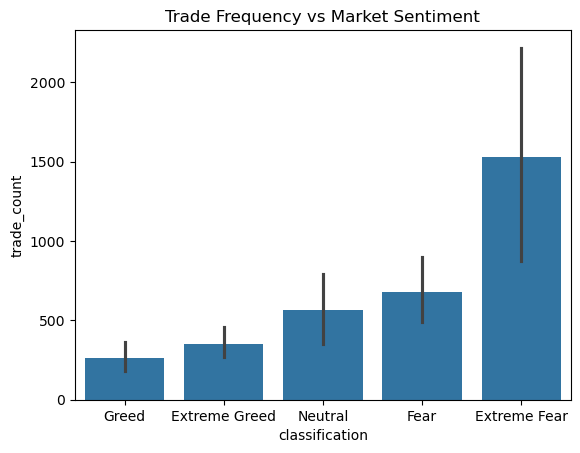

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
trades = pd.read_csv("C:/Users/KARTIK/Downloads/historical_data.csv")
sentiment = pd.read_csv("C:/Users/KARTIK/Downloads/fear_greed_index.csv")

# Clean columns
trades.columns = trades.columns.str.strip().str.lower()
sentiment.columns = sentiment.columns.str.strip().str.lower()

# Fix sentiment date
sentiment['date'] = pd.to_datetime(sentiment['date'], errors='coerce')
sentiment['date'] = sentiment['date'].dt.strftime('%Y-%m-%d')

# Fix trade timestamp
time_col = 'timestamp ist' if 'timestamp ist' in trades.columns else 'timestamp'
trades[time_col] = pd.to_datetime(
    trades[time_col], format='mixed', dayfirst=True, errors='coerce'
)
trades = trades.dropna(subset=[time_col])
trades['date'] = trades[time_col].dt.strftime('%Y-%m-%d')

# Merge
df = trades.merge(
    sentiment[['date', 'classification']],
    on='date',
    how='inner'
)

# Features
df['win'] = df['closed pnl'] > 0
df['is_long'] = df['side'].str.lower().isin(['buy', 'long'])

# Daily metrics
daily = df.groupby(['date', 'classification']).agg(
    total_pnl=('closed pnl', 'sum'),
    win_rate=('win', 'mean'),
    trade_count=('closed pnl', 'count'),
    long_ratio=('is_long', 'mean')
).reset_index()

# SUMMARY (FIXED)
print("\nFear vs Greed Summary\n")
print(daily.groupby('classification').mean(numeric_only=True))

# PLOTS
sns.boxplot(x='classification', y='total_pnl', data=daily)
plt.title("PnL vs Market Sentiment")
plt.show()

sns.barplot(x='classification', y='win_rate', data=daily)
plt.title("Win Rate vs Market Sentiment")
plt.show()

sns.barplot(x='classification', y='trade_count', data=daily)
plt.title("Trade Frequency vs Market Sentiment")
plt.show()
